In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Data loading

In [3]:
#df = pd.read_csv("https://data.transportation.gov/api/views/7wn6-i5b9/rows.csv?accessType=DOWNLOAD", dtype=object)
df = pd.read_csv("Highway-Rail_Grade_Crossing_Accident_Data__Form_57_.csv", dtype=object)

In [4]:
df.head()

,Railroad Code,Railroad Name,Report Year,Incident Number,Incident Year,Incident Month,Other Railroad Code,Other Railroad Name,Other Incident Number,Other Incident Year,Other Incident Month,Maintenance Railroad Code,Maintenance Railroad Name,Maintainance Incident Number,Maintenance Incident Year,Maintenance Incident Month,Grade Crossing ID,Date,Month,Day,Hour,Minute,AM/PM,Time,Nearest Station,Division,Subdivision,County Code,County Name,State Code,State Name,City Name,Highway Name,Public/Private Code,Public/Private,Highway User Code,Highway User,Estimated Vehicle Speed,Vehicle Direction Code,Vehicle Direction,Highway User Position Code,Highway User Position,Equipment Involved Code,Equipment Involved,Railroad Car Unit Position,Equipment Struck Code,Equipment Struck,Hazmat Involvement Code,Hazmat Involvement,Hazmat Released by Code,Hazmat Released by,Hazmat Released Name,Hazmat Released Quantity,Hazmat Released Measure,Temperature,Visibility Code,Visibility,Weather Condition Code,Weather Condition,Equipment Type Code,Equipment Type,Track Type Code,Track Type,Track Name,Track Class,Number of Locomotive Units,Number of Cars,Train Speed,Estimated/Recorded Speed,Train Direction Code,Train Direction,Crossing Warning Expanded Code 1,Crossing Warning Expanded Code 2,Crossing Warning Expanded Code 3,Crossing Warning Expanded Code 4,Crossing Warning Expanded Code 5,Crossing Warning Expanded Code 6,Crossing Warning Expanded Code 7,Crossing Warning Expanded Code 8,Crossing Warning Expanded Code 9,Crossing Warning Expanded Code 10,Crossing Warning Expanded Code 11,Crossing Warning Expanded Code 12,Crossing Warning Expanded 1,Crossing Warning Expanded 2,Crossing Warning Expanded 3,Crossing Warning Expanded 4,Crossing Warning Expanded 5,Crossing Warning Expanded 6,Crossing Warning Expanded 7,Crossing Warning Expanded 8,Crossing Warning Expanded 9,Crossing Warning Expanded 10,Crossing Warning Expanded 11,Crossing Warning Expanded 12,Signaled Crossing Warning Code,Signaled Crossing Warning,Crossing Warning Explanation Code,Crossing Warning Explanation,Roadway Condition Code,Roadway Condition,Crossing Warning Location Code,Crossing Warning Location,Warning Connected To Signal,Crossing Illuminated,User Age,User Gender,User Struck By Second Train,Highway User Action Code,Highway User Action,Driver Passed Vehicle,View Obstruction Code,View Obstruction,Driver Condition Code,Driver Condition,Driver In Vehicle,Crossing Users Killed,Crossing Users Injured,Vehicle Damage Cost,Number Vehicle Occupants,Employees Killed,Employees Injured,Number People On Train,Form 54 Filed,Passengers Killed,Passengers Injured,Video Taken,Video Used,Special Study 1,Special Study 2,Narrative,Total Killed Form 57,Total Injured Form 57,Railroad Type,Joint Code,Total Killed Form 55A,Total Injured Form 55A,District,Whistle Ban Code,Whistle Ban,Report Key,Reporting Railroad/Company Grouping,Reporting Railroad Class,Reporting Railroad SMT Grouping,Reporting Parent Railroad Code,Reporting Parent Railroad Name,Reporting Railroad Holding Company,Other Railroad Grouping,Other Railroad Class,Other Railroad SMT Grouping,Other Parent Railroad Code,Other Parent Railroad Name,Other Railroad Holding Company,Maintenance Railroad Grouping,Maintenance Railroad Class,Maintenance Railroad SMT Grouping,Maintenance Parent Railroad Code,Maintenance Parent Railroad Name,Maintenance Railroad Holding Company,Url
0,SP,Southern Pacific Transportation Company,1986,F3166,86,05,NaN,NaN,NaN,NaN,NaN,SP,Southern Pacific Transportation Company,F3166,86,05,762634A,05/01/1986,05,01,3,7,PM,03:07 PM,WARREN,NaN,NaN,149,WARREN,28,MISSISSIPPI,WARDEN,HWY 1948,Y,Public,G,School bus,0,4,West,1,Stalled or stuck on crossing,1,Train (units pulling),1,1,Rail equipment struck highway user,2,Rail equipment,NaN,NaN,NaN,NaN,NaN,65,2,Day,3,Rain,1,Freight Train,1,Main,MAIN,3,4,85,28,E,1,North,5,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hwy. traffic signals,Crossbucks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Provided minimum 20-s

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246664 entries, 0 to 246663
Columns: 160 entries, Railroad Code to Url
dtypes: object(160)
memory usage: 301.1+ MB


In [6]:
print(','.join(df.columns))

Railroad Code,Railroad Name,Report Year,Incident Number,Incident Year,Incident Month,Other Railroad Code,Other Railroad Name,Other Incident Number,Other Incident Year,Other Incident Month,Maintenance Railroad Code,Maintenance Railroad Name,Maintainance Incident Number,Maintenance Incident Year,Maintenance Incident Month,Grade Crossing ID,Date,Month,Day,Hour,Minute,AM/PM,Time,Nearest Station,Division,Subdivision,County Code,County Name,State Code,State Name,City Name,Highway Name,Public/Private Code,Public/Private,Highway User Code,Highway User,Estimated Vehicle Speed,Vehicle Direction Code,Vehicle Direction,Highway User Position Code,Highway User Position,Equipment Involved Code,Equipment Involved,Railroad Car Unit Position,Equipment Struck Code,Equipment Struck,Hazmat Involvement Code,Hazmat Involvement,Hazmat Released by Code,Hazmat Released by,Hazmat Released Name,Hazmat Released Quantity,Hazmat Released Measure,Temperature,Visibility Code,Visibility,Weather Condition Code,Weather C

In [7]:
def show_missing(tol=0.0):
  percent_missing = df.isnull().sum() * 100 / len(df)
  missing_value_df = pd.DataFrame({'Column': df.columns, 'Missing Percentage': percent_missing}).sort_values('Missing Percentage')
  missing_value_df[missing_value_df['Missing Percentage'] > tol].plot.barh(figsize=(5, 10), grid=True)

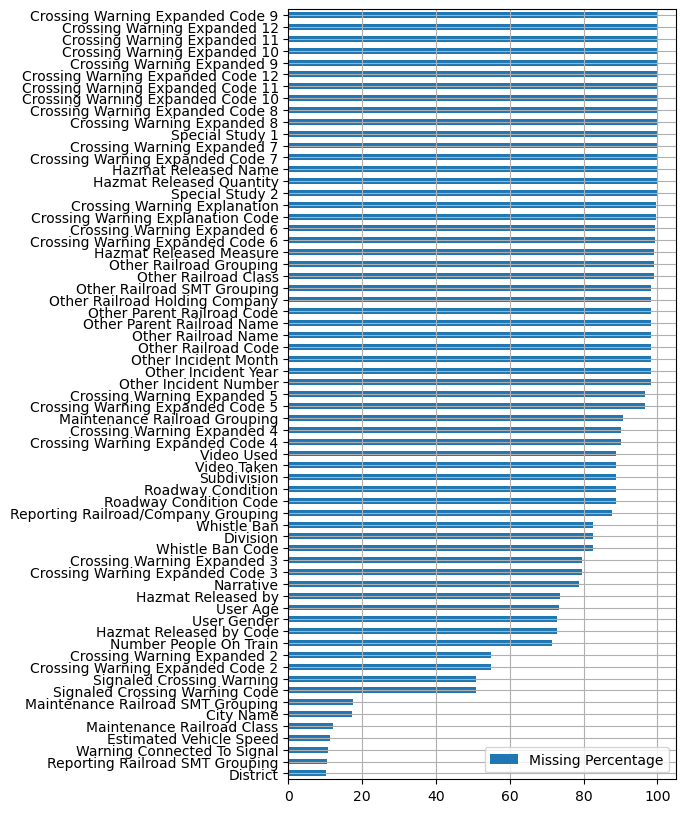

In [8]:
show_missing(tol=10)

# Column data conversion


## Datetime

In [9]:
df['DateTime'] = df['Date'] + ' ' + df['Hour'] + ':' + df['Minute'] + ' ' + df['AM/PM']
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%m/%d/%Y %I:%M %p', errors='coerce')
df = df.dropna(subset=['DateTime'])

## Dropping columns

In [10]:
"""
 'Report Year', 'Incident Year', 'Incident Month' were dropped, as they were already present in 'Date'
 '
 Other Railroad Code', 'Other Railroad Name', 'Other Incident Number', 'Other Incident Year', 'Other Incident Month',
 'Division', 'Subdivision', 'Hazmat Released by Code', 'Hazmat Released by', 'Hazmat Released Name', 'Hazmat Released Quantity',
 'Hazmat Released Measure', 'Crossing Warning Expanded 2-12', 'Crossing Warning Explanation Code', 'Crossing Warning Explanation',
 'Crossing Warning Location Code', 'Number People On Train',
 'Video Taken', 'Video Used', 'Special Study 1', 'Special Study 2', 'Narrative',
 'Whistle Ban Code', 'Whistle Ban', 'Reporting Railroad/Company Grouping',
 'Other Railroad Grouping', 'Other Railroad Class', 'Other Railroad SMT Grouping', 'Other Parent Railroad Code',
 'Other Parent Railroad Name', 'Other Railroad Holding Company', 'Maintenance Railroad Grouping', 'User Gender', 'User Age', 'Maintenance Railroad SMT Grouping',  'Roadway Condition'
  were dropped, as the majority did not have these columns filled

 'Date', 'Month', 'Day', 'Hour', 'Mintue', 'AM/PM', 'Time' were combined

 'Total Killed Form 57', 'Total Injured Form 57', 'Total Killed Form 55A', 'Total Injured Form 55A' were in other columns.

 'Railroad Code' and 'Railroad Name', 'Maintenance Railroad Code' and 'Maintenance Railroad Name', 'County Code' and 'County Name', 'State Code' and 'State Name',
 'Public/Private Code' and 'Public/Private', 'Highway User Code' and 'Highway User', 'Roadway Condition Code', 'Roadway Condition'
 'Vehicle Direction Code' and 'Vehicle Direction', 'Highway User Position Code' and 'Highway User Position',
 'Equipment Involved Code' and 'Equipment Involved', 'Equipment Struck Code' and 'Equipment Struck',
 'Hazmat Involvement Code' and 'Hazmat Involvement', 'Visibility Code' and 'Visibility', 'Weather Condition Code' and 'Weather Condition',
 'Equipment Type Code' and 'Equipment Type', 'Track Type Code' and 'Track Type',
 'Train Direction Code' and 'Train Direction', 'Crossing Warning Expanded Code K' and 'Crossing Warning Expanded K',
 'Signaled Crossing Warning Code' and 'Signaled Crossing Warning', 'Highway User Action Code' and 'Highway User Action',
 'View Obstruction Code' and 'View Obstruction', 'Driver Condition Code' and 'Driver Condition',
 'Reporting Parent Railroad Code' and 'Reporting Parent Railroad', 'Maintenance Parent Railroad Code' and 'Maintenance Parent Railroad Name'
  are the same

  'Form 54 Filed' was dropped, because unrelated


 'Grade Crossing ID', 'Report Key', 'Joint Code' was dropped, because it was very much unique to each row
"""
columns_to_delete = ['Report Year', 'Incident Number', 'Incident Year', 'Incident Month',
                     'Other Railroad Code', 'Other Railroad Name', 'Other Incident Number',
                     'Other Incident Year', 'Other Incident Month', 'Maintainance Incident Number',
                     'Maintenance Incident Year', 'Maintenance Incident Month', 'Grade Crossing ID',
                     'Date', 'Month', 'Day', 'Hour', 'Minute', 'AM/PM', 'Time',
                     'Division', 'Subdivision', 'County Code', 'Maintenance Railroad Code', 'Railroad Code', 'State Code', 'Public/Private Code', 'Highway User Code',
                     'Vehicle Direction Code', 'Highway User Position Code', 'Equipment Involved Code', 'Equipment Struck Code',
                     'Hazmat Involvement Code', 'Hazmat Released by Code', 'Hazmat Released by', 'Hazmat Released Name',
                     'Hazmat Released Quantity', 'Hazmat Released Measure', 'Visibility Code', 'Weather Condition Code',
                     'Equipment Type Code', 'Track Type Code', 'Train Direction Code', 'Signaled Crossing Warning Code',
                     'Crossing Warning Explanation Code', 'Crossing Warning Explanation', 'Roadway Condition Code',
                     'Crossing Warning Location Code', 'Highway User Action Code', 'View Obstruction Code', 'Driver Condition Code',
                     'Number People On Train', 'Form 54 Filed', 'Whistle Ban Code', 'Whistle Ban', 'Report Key', 'Reporting Railroad/Company Grouping',
                     'Reporting Parent Railroad Code',  'Other Railroad Grouping', 'Other Railroad Class', 'Other Railroad SMT Grouping', 'Other Parent Railroad Code',
                     'Video Taken', 'Video Used', 'Special Study 1', 'Special Study 2', 'Narrative',
                     'Other Parent Railroad Name', 'Other Railroad Holding Company', 'Maintenance Railroad Grouping', 'Maintenance Parent Railroad Code',
                     'Url', 'Signaled Crossing Warning', 'User Gender', 'User Age', 'Maintenance Railroad SMT Grouping',  'Roadway Condition', 'Joint Code',
                     'Total Killed Form 57', 'Total Injured Form 57', 'Total Killed Form 55A', 'Total Injured Form 55A'
                     ]

columns_to_delete.extend(['Crossing Warning Expanded Code ' + str(i) for i in range(1, 12+1)])
columns_to_delete.extend(['Crossing Warning Expanded ' + str(i) for i in range(2, 12+1)])

df = df.drop(columns_to_delete, axis=1, errors='ignore')

## Category Columns

In [11]:
category_columns = ['Railroad Name', 'Maintenance Railroad Name', 'Nearest Station', 'County Name',
                    'State Name', 'City Name', 'Highway Name', 'Public/Private',
                    'Highway User', 'Vehicle Direction', 'Highway User Position',
                    'Equipment Involved', 'Railroad Car Unit Position', 'Equipment Struck',
                    'Hazmat Involvement', 'Visibility', 'Weather Condition', 'Equipment Type',
                    'Track Type', 'Track Name', 'Track Class', 'Estimated/Recorded Speed',
                    'Train Direction', 'Crossing Warning Expanded 1',
                    'Crossing Warning Location', 'Warning Connected To Signal', 'Crossing Illuminated',
                    'User Struck By Second Train', 'Highway User Action', 'Driver Passed Vehicle',
                    'View Obstruction', 'Driver Condition', 'Driver In Vehicle', 'Railroad Type',
                    'District', 'Reporting Railroad Class', 'Reporting Railroad SMT Grouping', 'Reporting Parent Railroad Name',
                    'Reporting Railroad Holding Company', 'Maintenance Railroad Class',
                    'Maintenance Parent Railroad Name', 'Maintenance Railroad Holding Company']
df[category_columns] = df[category_columns].astype('category')

## Numerical Columns

In [12]:
numerical_columns = ['Estimated Vehicle Speed', 'Temperature', 'Number of Locomotive Units',
                 'Number of Cars', 'Train Speed', 'Crossing Users Killed', 'Crossing Users Injured', 'Vehicle Damage Cost',
                 'Number Vehicle Occupants', 'Employees Killed', 'Employees Injured', 'Passengers Killed', 'Passengers Injured']
df[numerical_columns] = df[numerical_columns].astype('float')

## Drop duplicates

In [13]:
df = df.drop_duplicates()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246532 entries, 0 to 246663
Data columns (total 56 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   Railroad Name                         246532 non-null  category      
 1   Maintenance Railroad Name             227244 non-null  category      
 2   Nearest Station                       245584 non-null  category      
 3   County Name                           246252 non-null  category      
 4   State Name                            246527 non-null  category      
 5   City Name                             204150 non-null  category      
 6   Highway Name                          244056 non-null  category      
 7   Public/Private                        246532 non-null  category      
 8   Highway User                          246527 non-null  category      
 9   Estimated Vehicle Speed               218772 non-null  float64  

In [15]:
df.head()

,Railroad Name,Maintenance Railroad Name,Nearest Station,County Name,State Name,City Name,Highway Name,Public/Private,Highway User,Estimated Vehicle Speed,Vehicle Direction,Highway User Position,Equipment Involved,Railroad Car Unit Position,Equipment Struck,Hazmat Involvement,Temperature,Visibility,Weather Condition,Equipment Type,Track Type,Track Name,Track Class,Number of Locomotive Units,Number of Cars,Train Speed,Estimated/Recorded Speed,Train Direction,Crossing Warning Expanded 1,Crossing Warning Location,Warning Connected To Signal,Crossing Illuminated,User Struck By Second Train,Highway User Action,Driver Passed Vehicle,View Obstruction,Driver Condition,Driver In Vehicle,Crossing Users Killed,Crossing Users Injured,Vehicle Damage Cost,Number Vehicle Occupants,Employees Killed,Employees Injured,Passengers Killed,Passengers Injured,Railroad Type,District,Reporting Railroad Class,Reporting Railroad SMT Grouping,Reporting Parent Railroad Name,Reporting Railroad Holding Company,Maintenance Railroad Class,Maintenance Parent Railroad Name,Maintenance Railroad Holding Company,DateTime
0,Southern Pacific Transportation Company,Southern Pacific Transportation Company,WARREN,WARREN,MISSISSIPPI,WARDEN,HWY 1948,Public,School bus,0.0,West,Stalled or stuck on crossing,Train (units pulling),1,Rail equipment struck highway user,Rail equipment,65.0,Day,Rain,Freight Train,Main,MAIN,3,4.0,85.0,28.0,E,North,Hwy. traffic signals,Both sides,No,Yes,No,Stopped on crossing,No,Not obstructed,Uninjured,No,0.0,0.0,10000.0,0.0,0.0,0.0,0.0,0.0,1L,3,Class 1,SMT-6 - UP/KCS,Union Pacific Railroad Company,Union Pacific Railroad Company,Class 1,Union Pacific Railroad Company,Union Pacific Railroad Company,1986-05-01 15:07:00
1,Columbus & Greenville Railway Company,Columbus & Greenville Railway Company,GREENWOOD,LOWNDES,MISSISSIPPI,GREENWOOD,HWY 82,Public,Truck-trailer,45.0,North,Moving over crossing,Train (units pulling),1,Rail equipment struck by highway user,Neither,80.0,Day,Clear,Yard/switching,Main,MAINLINE,1,1.0,4.0,8.0,E,West,Hwy. traffic signals,Both sides,Unknown,No,No,Did not stop,No,Not obstructed,Uninjured,Yes,0.0,0.0,200.0,1.0,0.0,1.0,0.0,0.0,3L,3,Class 3,SMT-2 - Short Line East,Columbus & Greenville Railway Company,Genesee & Wyoming,Class 3,Columbus & Greenville Railway Company,Genesee & Wyoming,1986-06-02 12:45:00
2,Columbus & Greenville Railway Company,Columbus & Greenville Railway Company,GREENWOOD,LEFLORE,MISSISSIPPI,GREENWOOD,HWY 82,Public,Auto,NaN,East,Moving over crossing,Train (units pushing),1,Rail equipment struck highway user,Neither,95.0,Day,Clear,Yard/switching,Yard,SCALE TRACK,NaN,1.0,6.0,1.0,E,East,Hwy. traffic signals,Opposite side of vehicle approach,Unknown,Unknown,No,Did not stop,No,Not obstructed,Uninjured,Yes,0.0,0.0,200.0,2.0,0.0,0.0,0.0,0.0,3L,3,Class 3,SMT-2 - Short Line East,Columbus & Greenville Railway Company,Genesee & Wyoming,Class 3,Columbus & Greenville Railway Company,Genesee & Wyoming,1986-06-19 13:35:00
3,St. Louis-San Francisco Railway,NaN,TULSA TERMINAL,TULSA,OKLAHOMA,TULSA,UNION STREET,Public,Truck-trailer,5.0,South,Moving over crossing,Train (units pulling),1,Rail equipment struck highway user,Highway user,65.0,Dark,Clear,Yard/switching,Yard,MAIN LINE,1,1.0,6.0,4.0,E,East,Crossbucks,Both sides,No,No,No,Did not stop,No,Not obstructed,Uninjured,Yes,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1L,NaN,Class 1,SMT-5 - BNSF,BNSF Railway Company,BNSF Railway Company,NaN,NaN,NaN,1976-07-04 04:25:00
4,GULF AND MISSISSIPPI RAILROAD CORPORATION,GULF AND MISSISSIPPI RAILROAD CORPORATION,WEST POINT,CLAY,MISSISSIPPI,WEST POINT,TIBBEE ROAD,Public,Auto,25.0,East,Moving over crossing,Train (units pulling),41,Rail equipment struck by highway user,Neither,85.0,Dark,Clear,Freight Train,Main,MAIN,2,2.0,96.0,25.0,E,South,Audible,Both sides,No,No,No,Did not stop,No,Not obstructed,Injured,Yes,0.0,1.0,1000.0,1.0,0.0,0.0,0.0,0.0,3L,3,NaN,NaN,Gulf And Mississippi Railroad Corporation,Not Assigned,NaN,Gulf And Mississippi Railroad Corporation,No

## Missing value handeling

## Showing percentage of missing values

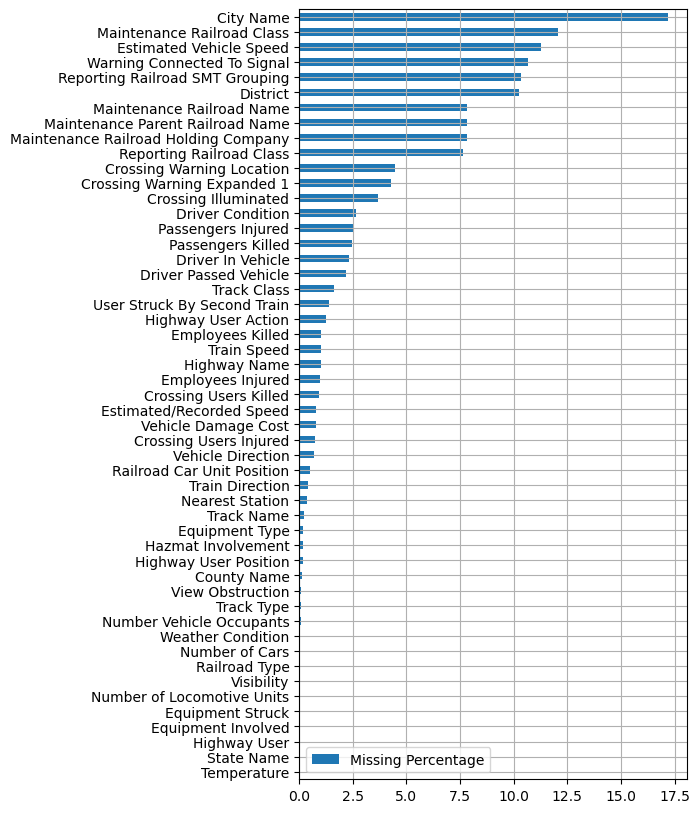

In [16]:
show_missing()

## Handle missing numerical values with BayesianRidge imputer

In [17]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

regressor_imputer = IterativeImputer(random_state=0, estimator=BayesianRidge(), tol=1e-3, initial_strategy='mean')
df[numerical_columns] = regressor_imputer.fit_transform(df[numerical_columns])

## Hande missing categorical values with replacing them with the mode

In [18]:
for column in category_columns:
  df[column] = df[column].fillna(df[column].mode()[0])

## Statistical summary of numerical columns

In [19]:
df[numerical_columns].describe()

,Estimated Vehicle Speed,Temperature,Number of Locomotive Units,Number of Cars,Train Speed,Crossing Users Killed,Crossing Users Injured,Vehicle Damage Cost,Number Vehicle Occupants,Employees Killed,Employees Injured,Passengers Killed,Passengers Injured
count,246532.000000,246532.000000,246532.000000,246532.000000,246532.000000,246532.000000,246532.000000,246532.000000,246532.000000,246532.000000,246532.000000,246532.000000,246532.000000
mean,11.486941,56.478835,2.174939,42.117121,24.497639,0.100818,0.339010,3609.390869,1.197500,0.000454,0.023026,0.000112,0.012539
std,12.985927,23.133218,1.591797,41.883823,18.171125,0.368664,0.705263,12647.940088,5.172374,0.025152,0.221265,0.026575,0.529919
min,-2.544103,-99.000000,0.000000,0.000000,0.000000,-0.139765,0.000000,0.000000,0.000000,-0.000764,-0.020196,-0.007756,-0.082653
25%,0.000000,40.000000,1.000000,6.000000,8.000000,0.000000,0.000000,300.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.171805,60.000000,2.000000,27.000000,22.361600,0.000000,0.000000,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,15.000000,75.000000,3.000000,73.000000,38.000000,0.000000,1.000000,3000.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,510.000000,870.000000,392.000000,944.000000,750.000000,12.000000,41.000000,1000000.000000,2500.000000,3.000000,19.000000,11.000000,101.000000


# EDA

<Axes: title={'center': 'Accidents across years'}, ylabel='Frequency'>

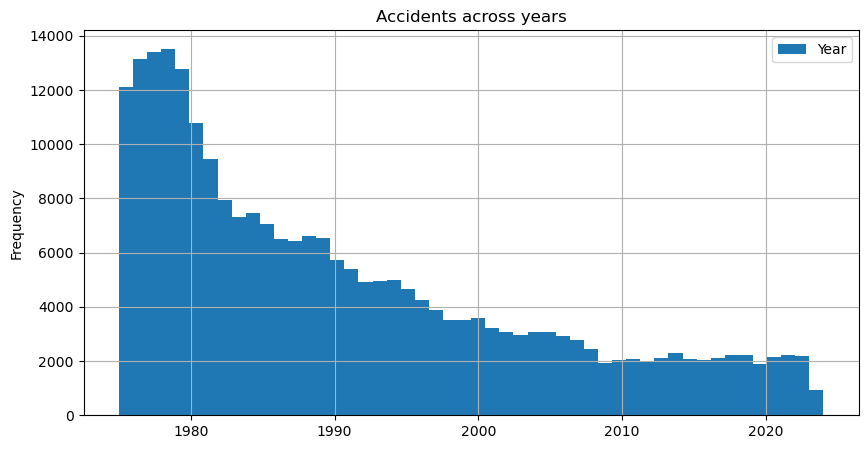

In [20]:
df['Year'] = df['DateTime'].dt.year
df['Year'].plot.hist(figsize=(10, 5), grid=True, title='Accidents across years', legend=True, bins=50)

**Observations**:

*   Decreasing Trend: There is a clear and significant decrease in the number of railroad crossing accidents from 1975 to the early 2000s. The decline is steep, particularly in the late 1970s and throughout the 1980s.

*   Stabilization: After around 2001, the number of accidents appears to stabilize, maintaining a relatively consistent level between 1,500 and 2,500 accidents per year.

*   Minor Fluctuations: While the overall trend is stable after 2001, there are minor year-to-year fluctuations, with no significant upward or downward trends observed in the past two decades.

*   Recent Years: The data for 2024 shows a lower accident count, which might be incomplete.

<Axes: title={'center': 'Accidents across months'}, xlabel='Month', ylabel='Accident count'>

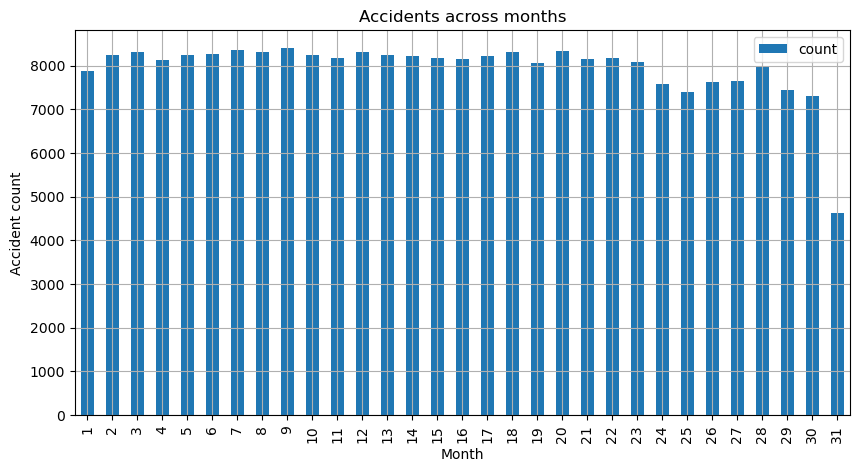

In [21]:
df['Month'] = df['DateTime'].dt.day
df['Month'].value_counts().sort_index() \
  .plot.bar(figsize=(10, 5), grid=True, title='Accidents across months', legend=True, ylabel='Accident count')

**Observations**:

*   January and December Peaks: The highest number of railroad crossing accidents occurs in January and December, with both months showing counts above 25,000.

*   Winter Months: The winter months (January, February, and December) generally have higher accident counts compared to other months, which may be influenced by adverse weather conditions such as snow, ice, or reduced visibility.

*   Spring and Summer Dip: Accident counts are generally lower during the spring and summer months (April to July), with the lowest counts observed around June and July.

*   Autumn Increase: There is a noticeable increase in accidents starting in October and continuing through November and December, suggesting that accidents become more frequent as the year progresses towards winter.

*   Consistent Lower Counts: The months of April through September show a relatively consistent and lower number of accidents, indicating possibly more favorable conditions during these months.

C:\Users\Asus\AppData\Local\Temp\ipykernel_14472\2732219530.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for key, grp in df.groupby(['Weather Condition']):


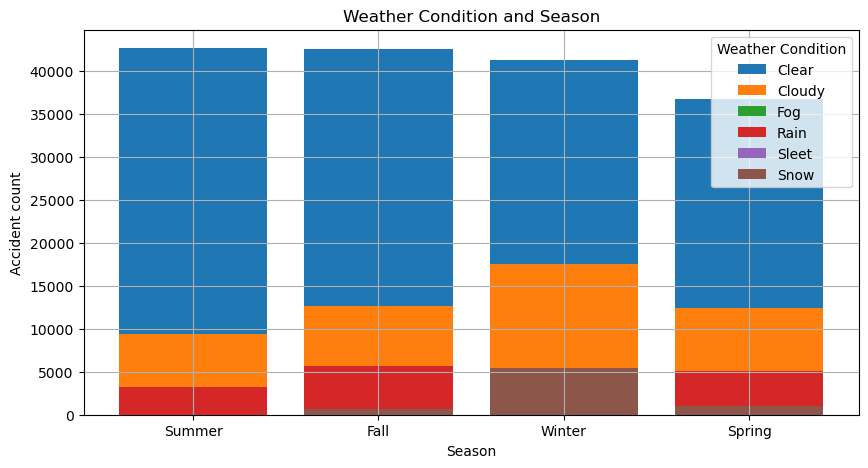

In [22]:
df['Season'] = df['DateTime'].dt.month %12 // 3 + 1
df['Season'] = df['Season'].replace({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}).astype('category')

fig, ax = plt.subplots(figsize=(10, 5))

for key, grp in df.groupby(['Weather Condition']):
    counts = grp['Season'].value_counts().sort_values(ascending=False)
    ax.bar(counts.index, counts.values, label=key[0])

ax.legend(title='Weather Condition')
ax.set_title('Weather Condition and Season')
ax.set_ylabel('Accident count')
ax.set_xlabel('Season')
ax.grid()
plt.show()

**Observations**:

*   Seasonal Effects: Seasons do not have a clear effect on accident numbers.

*   Clear Weather Dominance: In all seasons, the majority of railroad crossing accidents occur under clear weather conditions, with clear weather consistently accounting for the highest accident counts.

*   Cloudy Conditions: Cloudy weather is the second most common condition associated with accidents, following clear weather, across all seasons.

*   Winter Season Variability: Winter shows a wider variety of weather conditions associated with accidents compared to other seasons. In addition to clear and cloudy weather, there are noticeable contributions from snow.

<Axes: title={'center': 'Accidents across days of months'}, xlabel='Day', ylabel='Accident count'>

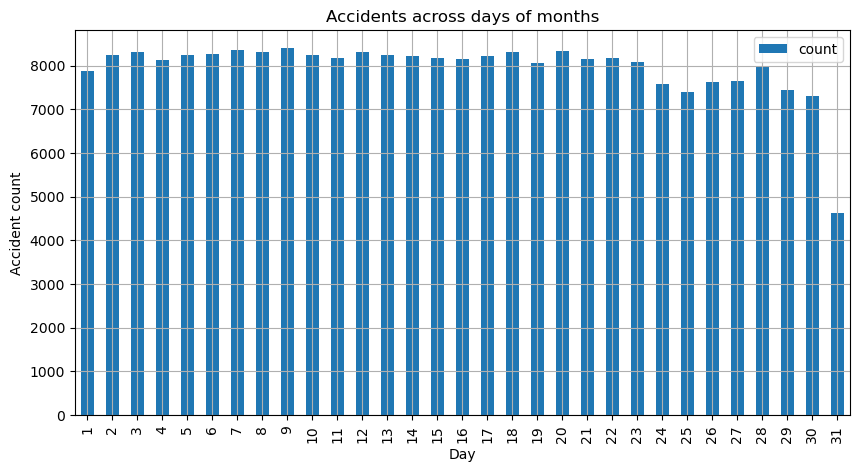

In [23]:
df['Day'] = df['DateTime'].dt.day
df['Day'].value_counts().sort_index() \
  .plot.bar(figsize=(10, 5), grid=True, title='Accidents across days of months', legend=True, ylabel='Accident count')

**Observations**:

*   General Distribution: The number of accidents is relatively consistent across most days of the month, with counts generally around 7,500 to 8,500.

*   31st Day: There is a significant drop in the number of accidents on the 31st day of the month, likely because many months do not have a 31st day.

*   End of Month: A gradual decline in accidents is observed from the 25th to the 30th, before the sharp drop on the 31st.

*   Peak: The 18th and 22nd days show slightly higher accident counts compared to other days.

<Axes: title={'center': 'Accidents across days of week'}, xlabel='Weekday', ylabel='Accident count'>

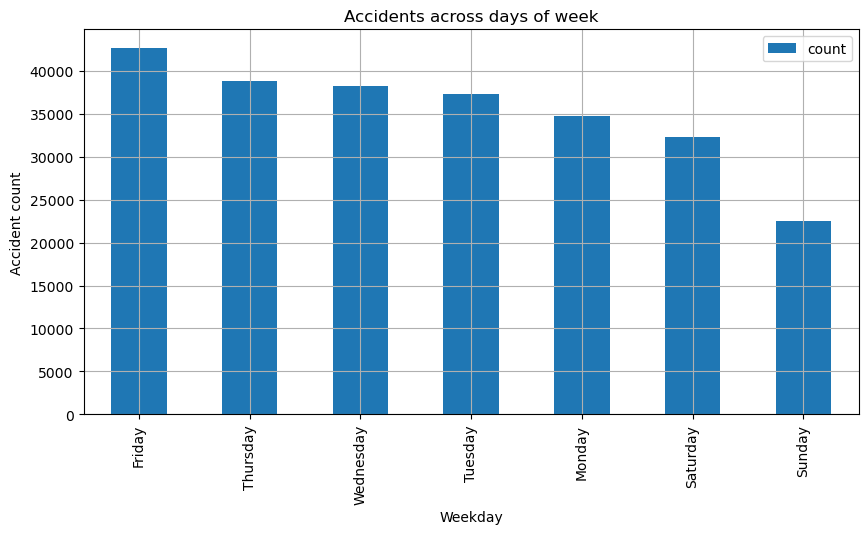

In [24]:
df['Weekday'] = df['DateTime'].dt.day_name().astype('category')
df['Weekday'].value_counts() \
  .plot.bar(figsize=(10, 5), grid=True, title='Accidents across days of week', legend=True, ylabel='Accident count')

**Observations**:

*   Highest Accident Day: Friday has the highest number of accidents, indicating that the end of the workweek is particularly risky for railroad crossing incidents.

*   Lower Accident Days: Sunday has the lowest number of accidents, followed by Saturday, indicating that weekends generally see fewer incidents, likely due to reduced traffic.

*   Weekday vs. Weekend: There is a clear distinction between weekdays and weekends, with significantly more accidents occurring on weekdays, reflecting higher levels of activity and possibly more frequent train and vehicle interactions.

<Axes: title={'center': 'Accidents across time of day'}, xlabel='Time of day', ylabel='Accident count'>

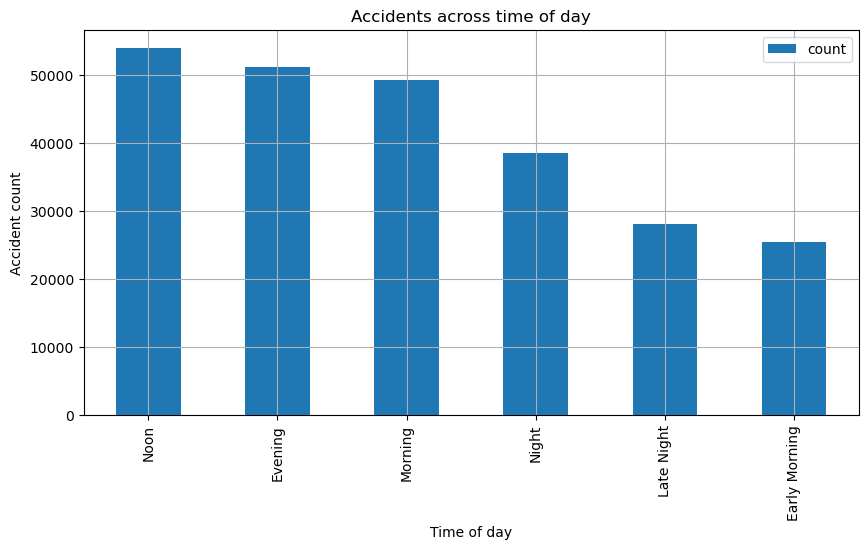

In [25]:
df['Time of day'] = (df['DateTime'].dt.hour % 24 + 4) // 4
df['Time of day'] = df['Time of day'].replace({1: 'Late Night', 2: 'Early Morning', 3: 'Morning', 4: 'Noon',5: 'Evening', 6: 'Night'}).astype('category')

df['Time of day'].value_counts().sort_values(ascending=False) \
  .plot.bar(figsize=(10, 5), grid=True, title='Accidents across time of day', legend=True, ylabel='Accident count')

**Observations**:

*   Peak Accident Times: The highest number of accidents occurs at noon, followed closely by the evening.

*   Morning and Night: The morning and night time periods have moderately high accident counts, slightly lower than noon and evening but still significant.

*   Noon and Evening High Accident Count: High traffic volumes during midday and evening rush hours likely contribute to the increased accident rates during these times.
*   Late Night and Early Morning Low Accident Count: Reduced traffic and potentially fewer trains operating during these times may account for the lower accident rates.


C:\Users\Asus\AppData\Local\Temp\ipykernel_14472\2547526602.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for key, grp in df.groupby(['Crossing Illuminated']):


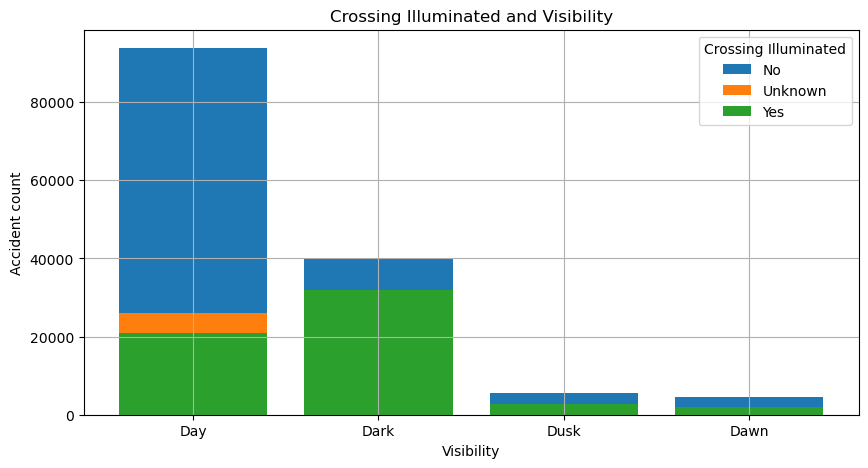

In [26]:
fig, ax = plt.subplots(figsize=(10, 5))

for key, grp in df.groupby(['Crossing Illuminated']):
    counts = grp['Visibility'].value_counts().sort_values(ascending=False)
    ax.bar(counts.index, counts.values, label=key[0])

ax.legend(title='Crossing Illuminated')
ax.set_title('Crossing Illuminated and Visibility')
ax.set_ylabel('Accident count')
ax.set_xlabel('Visibility')
ax.grid()
plt.show()

**Observations**:

*   Daytime Accidents: The majority of accidents occur during the day, with a large portion happening at crossings that are not illuminated. This suggests that daylight visibility alone does not prevent accidents.
*   Dark Conditions: During dark conditions, a significant number of accidents occur even at illuminated crossings, indicating that illumination alone may not be sufficient to prevent accidents in low visibility situations.
*   Illumination Impact: The presence of illumination at crossings does not show a clear reduction in accidents, particularly at night, which might indicate that other factors, such as driver attentiveness or crossing design, play a more critical role in accident prevention.

<Axes: title={'center': 'Accidents across temperatures'}, ylabel='Frequency'>

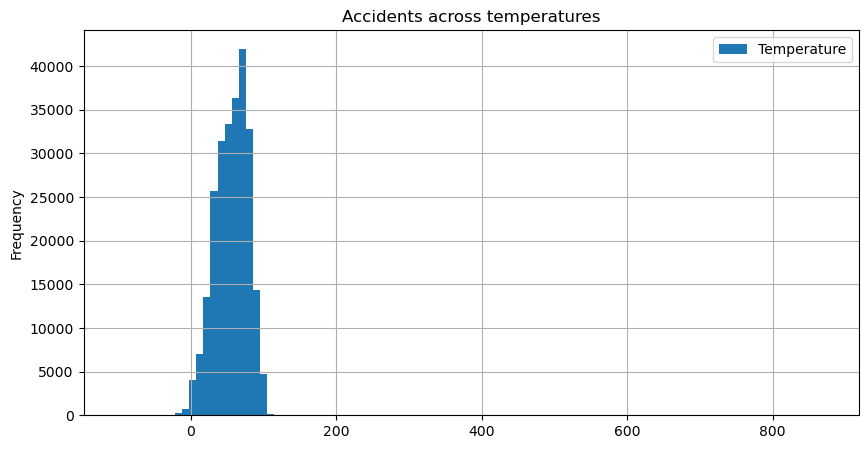

In [27]:
df['Temperature'].plot.hist(figsize=(10, 5), grid=True, title='Accidents across temperatures', legend=True, bins=100)

<Axes: title={'center': 'Accidents across temperatures'}, ylabel='Frequency'>

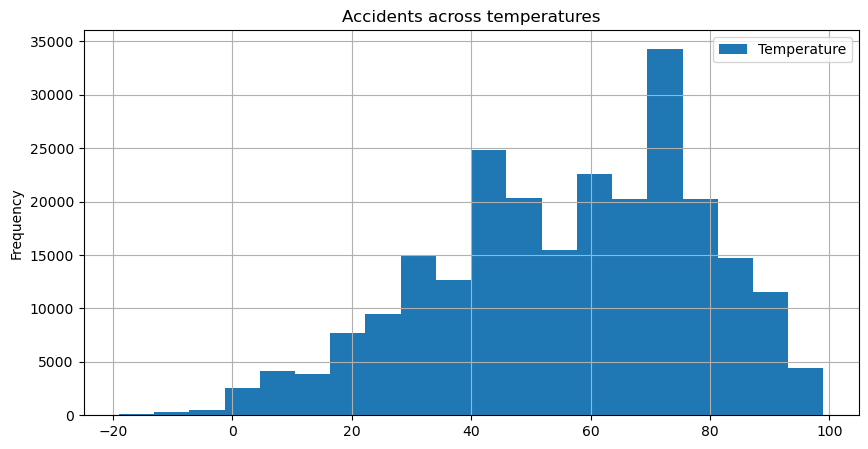

In [28]:
df[(df['Temperature'] < 100) & (df['Temperature'] > -20)]['Temperature'].plot.hist(figsize=(10, 5), grid=True, title='Accidents across temperatures', legend=True, bins=20)

<Axes: title={'center': 'Accidents across temperatures'}, xlabel='Temperature', ylabel='Accident count'>

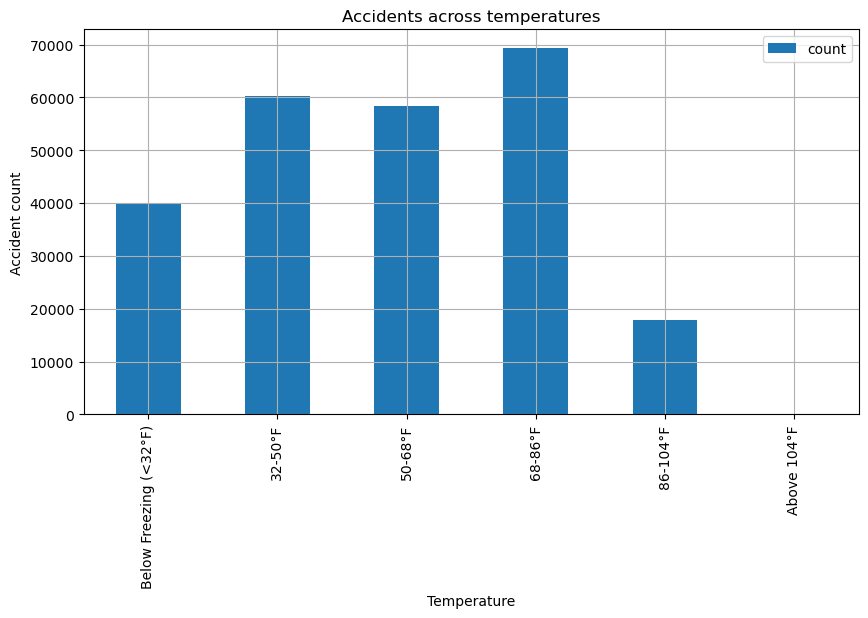

In [29]:
temperatures = pd.cut(df['Temperature'],
                      bins=[-10, 32, 50, 68, 86, 104, 122],
                      labels=['Below Freezing (<32°F)', '32-50°F', '50-68°F', '68-86°F', '86-104°F', 'Above 104°F']
)
temperatures.value_counts().sort_index() \
  .plot.bar(figsize=(10, 5), grid=True, title='Accidents across temperatures', legend=True, ylabel='Accident count')

**Observations**:

*   Most Common Accident Temperatures: The highest number of accidents occurs in the temperature range of 68-86°F, indicating that warmer weather might correlate with increased accident frequency.

*   Extreme Heat: Very few accidents occur at temperatures above 104°F, suggesting that extreme heat might lead to reduced travel or better adherence to safety due to uncomfortable conditions.

*   Temperature Impact: The data indicates that railroad crossing accidents are more common in moderate to warm temperatures, with a decrease in very cold and very hot conditions. This could be linked to general traffic patterns, weather-related factors, or behavioral changes in extreme temperatures.
*   Outliers: There seems to be some outliers in temperatures above 100°F and under -20°F

<Axes: title={'center': 'Accidents across state name'}, xlabel='State Name', ylabel='Accident count'>

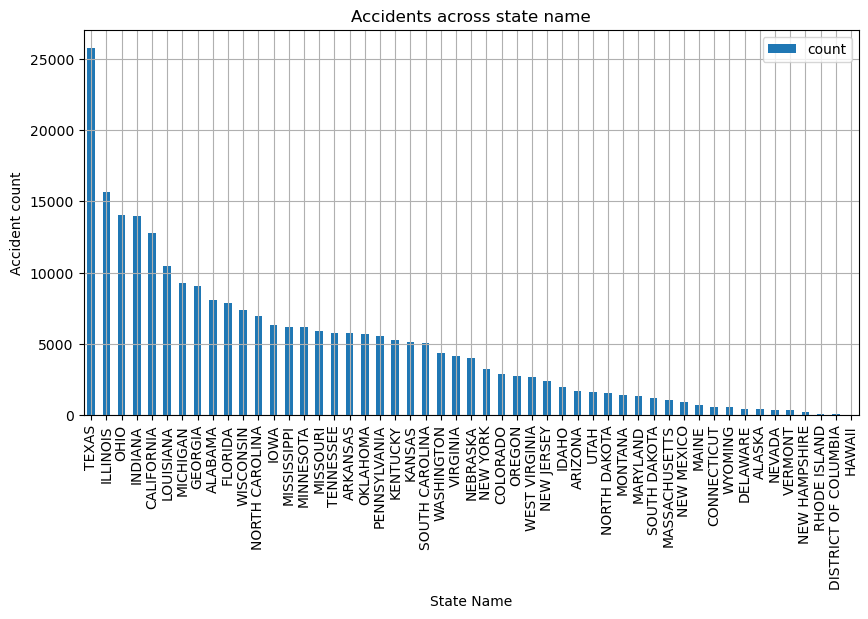

In [30]:
df['State Name'].value_counts().sort_values(ascending=False) \
  .plot.bar(figsize=(10, 5), grid=True, title='Accidents across state name', legend=True, ylabel='Accident count')

**Observations**:

*   Top States: Texas has the highest number of railroad crossing accidents, followed by Illinois, Ohio, and Indiana. Texas, has a large land area and population, which could contribute to a higher number of crossings and thus more accidents

*   High Concentration: The top 10 states (Texas to Georgia) have significantly higher accident counts compared to other states, with a steep drop-off after the top few states.

*   Distribution: The distribution is heavily skewed, with a small number of states contributing to the majority of accidents, while most states have relatively few incidents.

<Axes: title={'center': 'Accidents across highway users'}, xlabel='Highway User', ylabel='Accident count'>

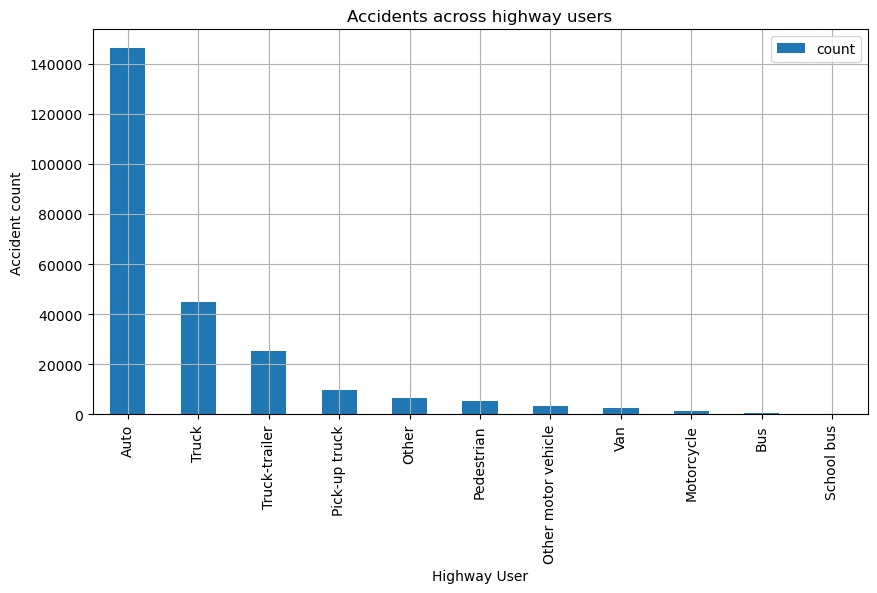

In [31]:
df['Highway User'].value_counts().sort_values(ascending=False) \
  .plot.bar(figsize=(10, 5), grid=True, title='Accidents across highway users', legend=True, ylabel='Accident count')

**Observations**:

*   Dominance of Autos: The vast majority of accidents involve "Auto" vehicles, significantly higher than any other category.

*   Trucks and Truck-Trailers: Trucks and truck-trailers are the next most common vehicle types involved in accidents, though their counts are much lower than autos.

*   Steep Drop-off: There's a steep drop-off in accident counts after the top three categories (Auto, Truck, Truck-trailer), with all other categories having relatively minimal impact.

*   Infrastructure Implications: The data suggests autos are most at risk at railroad crossings, possibly due to their higher numbers on the road compared to other vehicle types.

<Axes: title={'center': 'Accidents across districts'}, xlabel='District', ylabel='Accident count'>

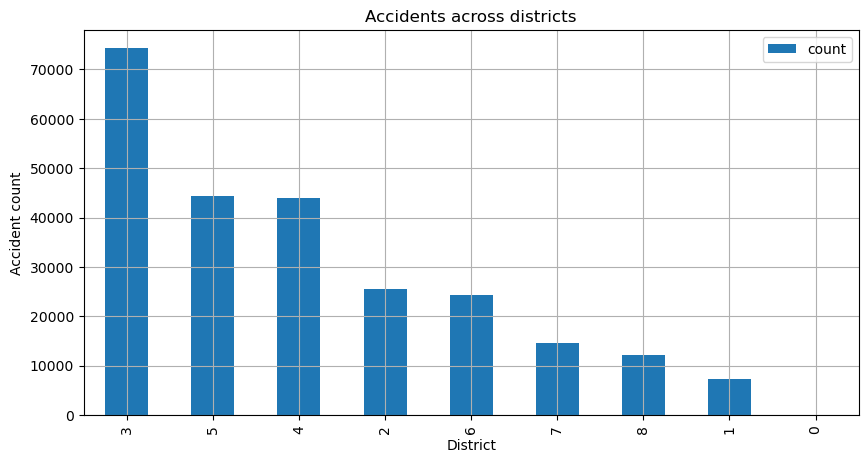

In [32]:
df['District'].value_counts().sort_values(ascending=False) \
  .plot.bar(figsize=(10, 5), grid=True, title='Accidents across districts', legend=True, ylabel='Accident count')

**Observations**:

*   District 3: This district has the highest number of accidents, significantly higher than any other district.

*   High Accident Districts: Districts 5 and 4 also have high accident counts, indicating they are major areas of concern after District 3.

<Axes: title={'center': 'Accidents across county names'}, xlabel='County Name', ylabel='Accident count'>

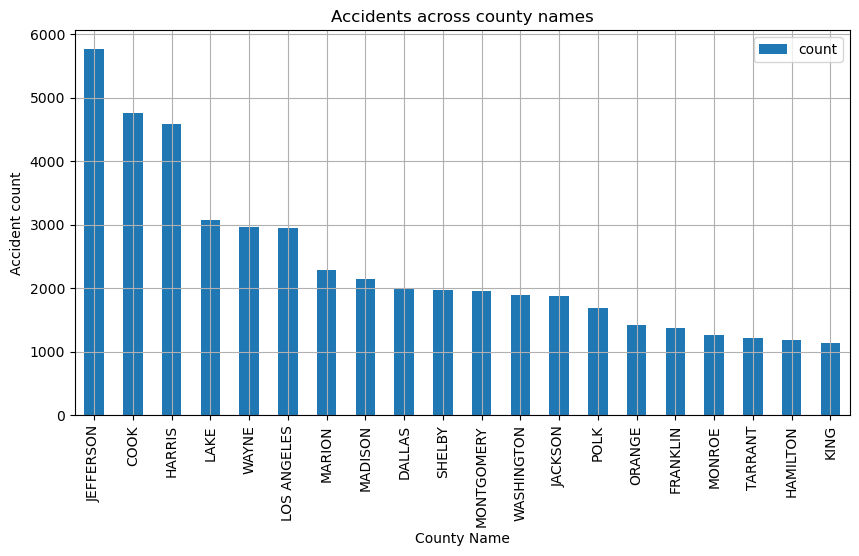

In [33]:
df['County Name'].value_counts().sort_values(ascending=False).head(20) \
  .plot.bar(figsize=(10, 5), grid=True, title='Accidents across county names', legend=True, ylabel='Accident count')

**Observations**:

*   Jefferson County: This county has the highest number of railroad crossing accidents, with nearly 6,000 incidents.

*   Top Counties: Cook, Harris, and Lake counties also have high accident counts, all exceeding 4,000 incidents.

<Axes: title={'center': 'Accidents across user actions'}, xlabel='Highway User Action', ylabel='Accident count'>

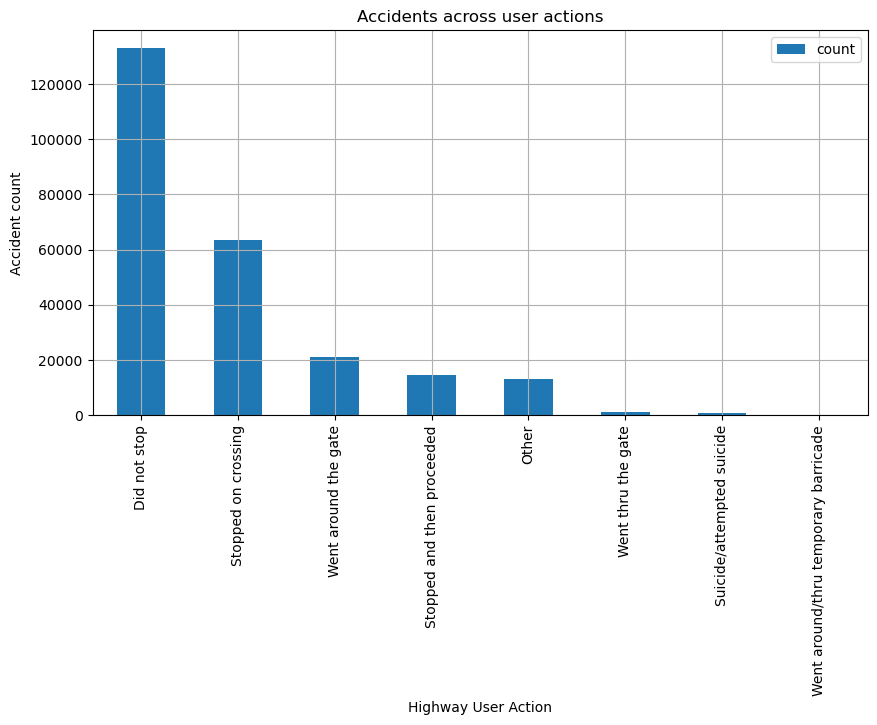

In [34]:
df['Highway User Action'].value_counts().sort_values(ascending=False) \
  .plot.bar(figsize=(10, 5), grid=True, title='Accidents across user actions', legend=True, ylabel='Accident count')

**Observations**:

*   "Did not stop": The majority of accidents, over 120,000 incidents, are associated with highway users who did not stop at the crossing, hinting as the leading cause of accidents.

<Axes: title={'center': 'Accidents across train speeds'}, ylabel='Frequency'>

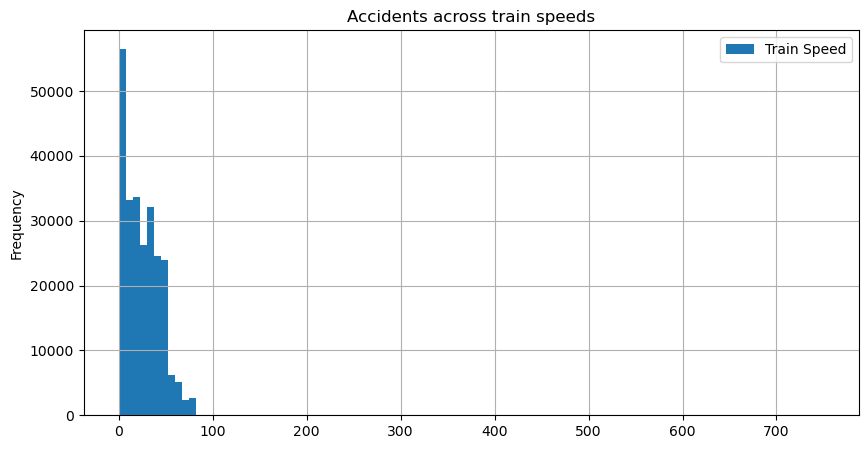

In [35]:
df['Train Speed'].plot.hist(figsize=(10, 5), grid=True, title='Accidents across train speeds', legend=True, bins=100)

<Axes: title={'center': 'Accidents across train speeds'}, ylabel='Frequency'>

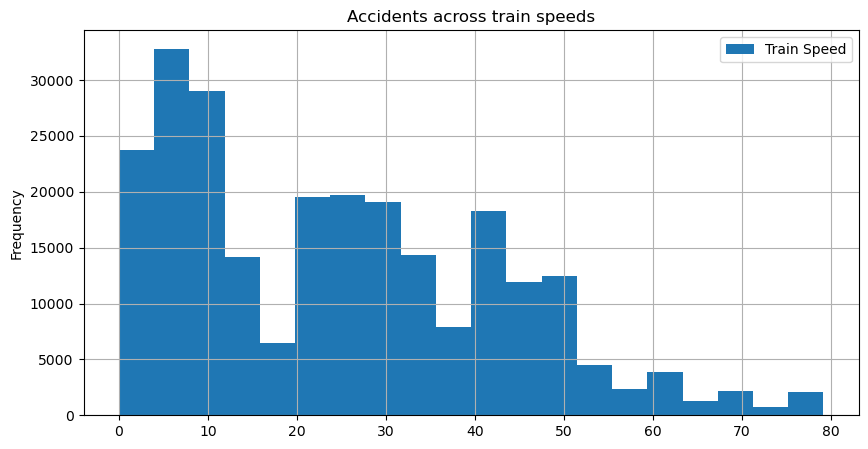

In [36]:
df[df['Train Speed'] < 80]['Train Speed'].plot.hist(figsize=(10, 5), grid=True, title='Accidents across train speeds', legend=True, bins=20)

<Axes: title={'center': 'Accidents across train speeds'}, xlabel='Train Speed (Miles/Hour)', ylabel='Accident count'>

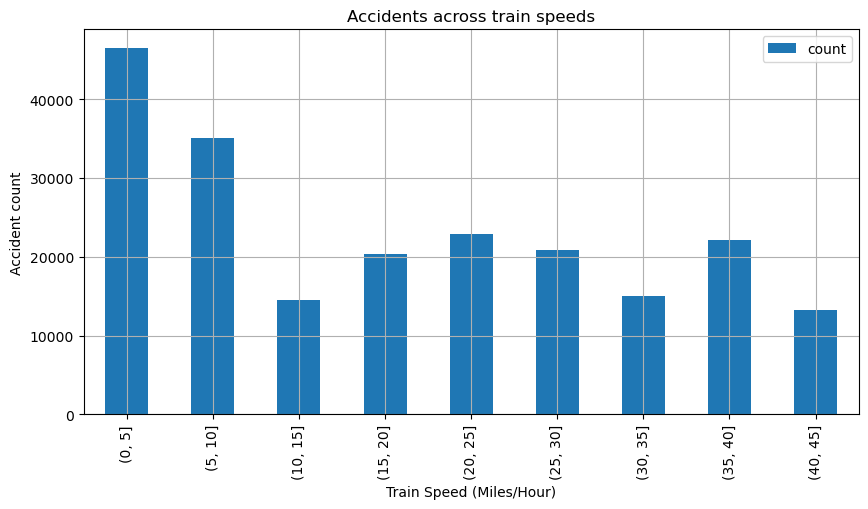

In [37]:
train_speed = pd.cut(df['Train Speed'], bins=range(0, 50, 5))
train_speed.value_counts().sort_index() \
  .plot.bar(figsize=(10, 5), grid=True, title='Accidents across train speeds', legend=True, ylabel='Accident count', xlabel='Train Speed (Miles/Hour)')

**Observations**:

*   Low-Speed Accidents: The highest number of accidents occurs at train speeds between 0-5 miles per hour, with over 40,000 incidents. This suggests that slow-moving trains might be involved in more accidents, possibly due to increased train crossings or urban environments where slower speeds are common.

*   Decreasing Trend: Accident counts generally decrease as train speeds increase, with the lowest number of accidents occurring in the 10-15 mph range.

*   Mid-to-High Speed Accidents: As train speeds increase from 15-40 mph, there is a noticeable but smaller increase in accident counts, though these are still lower than the counts at very low speeds.
*   Outliers: There seems to be some outliers in speeds above 80 mph

<Axes: title={'center': 'Accidents across user speeds'}, ylabel='Frequency'>

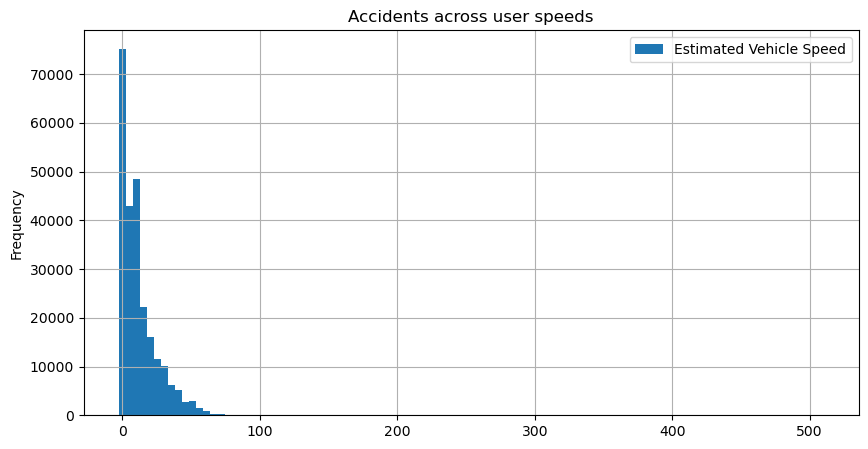

In [38]:
df['Estimated Vehicle Speed'].plot.hist(figsize=(10, 5), grid=True, title='Accidents across user speeds', legend=True, bins=100)

<Axes: title={'center': 'Accidents across user speeds'}, ylabel='Frequency'>

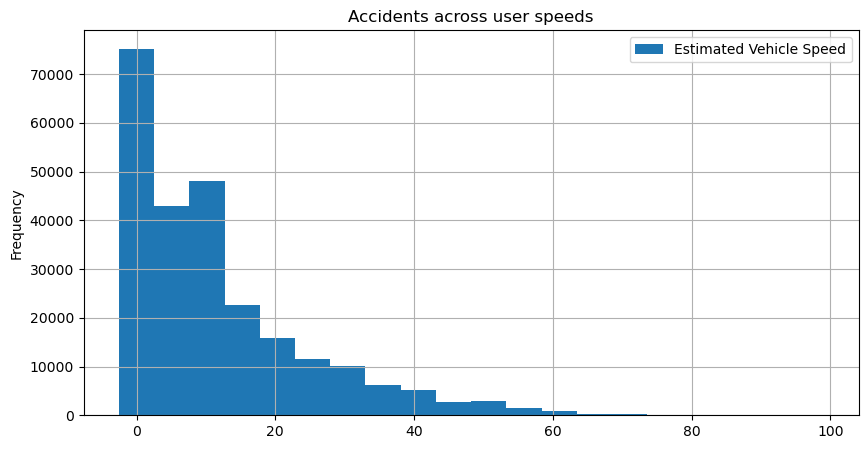

In [39]:
df[df['Estimated Vehicle Speed'] < 100]['Estimated Vehicle Speed'].plot.hist(figsize=(10, 5), grid=True, title='Accidents across user speeds', legend=True, bins=20)

<Axes: title={'center': 'Accidents across user speeds'}, xlabel='Estimated Vehicle Speed (Miles/Hour)', ylabel='Accident count'>

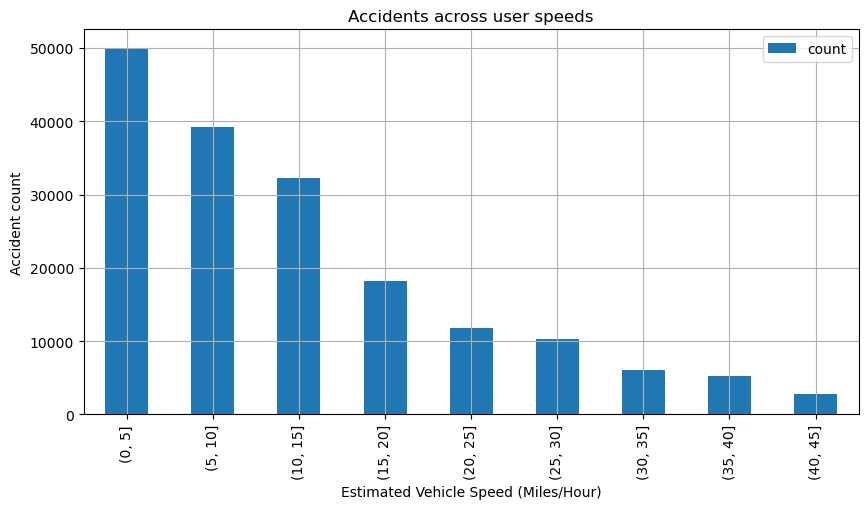

In [40]:
vehicle_speed = pd.cut(df['Estimated Vehicle Speed'], bins=range(0, 50, 5))
vehicle_speed.value_counts().sort_index() \
  .plot.bar(figsize=(10, 5), grid=True, title='Accidents across user speeds', legend=True, ylabel='Accident count', xlabel='Estimated Vehicle Speed (Miles/Hour)')

**Observations**:

*   Slow Speeds: In most accidents the estimated vehicle speed was around 5 to 15 miles per hour.

*   Decreasing Trend: There is a general decreasing trend in accident counts from low speeds to high speeds.

*   Outliers: There seems to be some outliers in speeds above 70 mph

<Axes: title={'center': 'Accidents across view obstruction'}, xlabel='View Obstruction', ylabel='Accident count'>

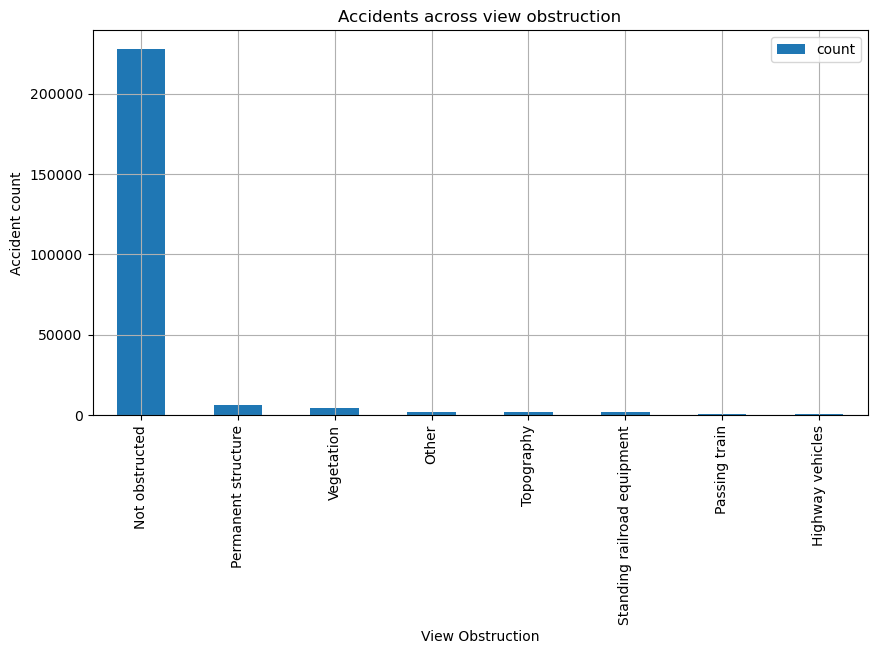

In [41]:
df['View Obstruction'].value_counts().sort_values(ascending=False) \
  .plot.bar(figsize=(10, 5), grid=True, title='Accidents across view obstruction', legend=True, ylabel='Accident count')

**Observations**:

*   Not Obstructed: View obstruction is not the cause of most accidents, suggesting factors other than view are primary causes.

<Axes: title={'center': 'Accidents across City Name'}, xlabel='City Name', ylabel='Accident count'>

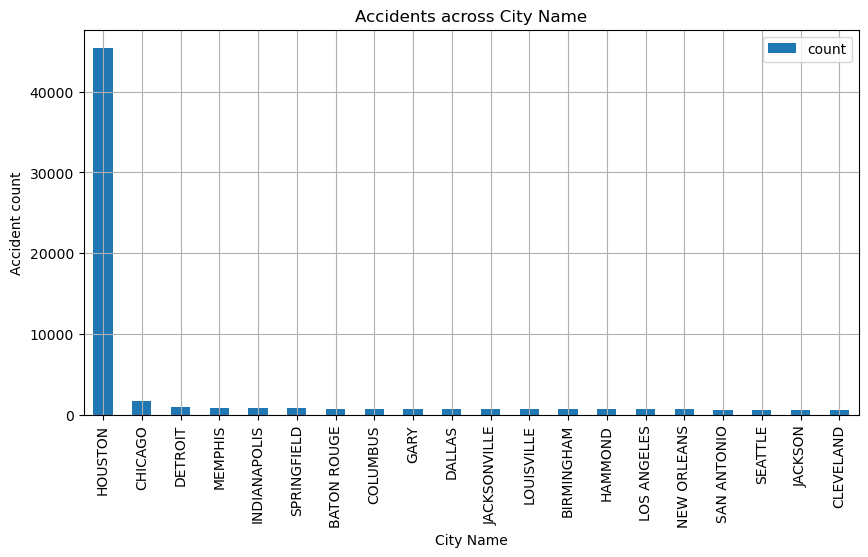

In [42]:
df['City Name'].value_counts().sort_values(ascending=False).head(20) \
  .plot.bar(figsize=(10, 5), grid=True, title='Accidents across City Name', legend=True, ylabel='Accident count')

**Observations**:

*   Houston: Houston has an exceptionally high number of railroad crossing accidents, far surpassing top 20 cities.

<Axes: title={'center': 'Accidents across Vehicle Direction'}, xlabel='Vehicle Direction', ylabel='Accident count'>

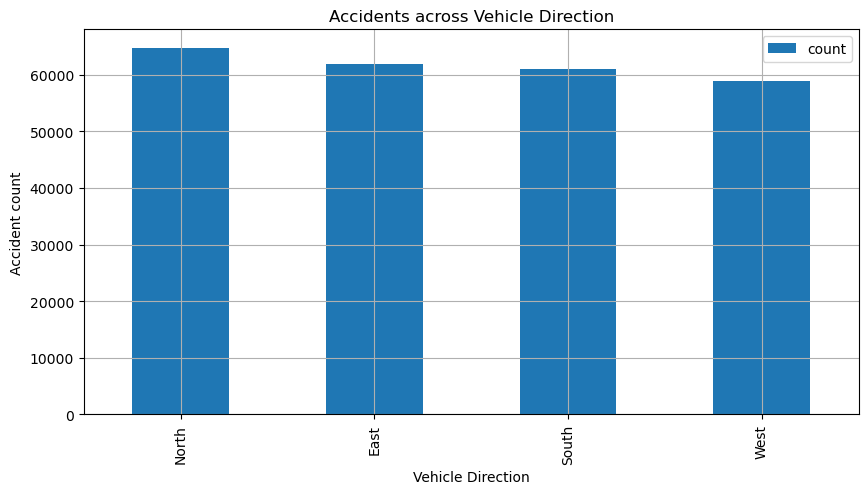

In [43]:
df['Vehicle Direction'].value_counts().sort_values(ascending=False) \
  .plot.bar(figsize=(10, 5), grid=True, title='Accidents across Vehicle Direction', legend=True, ylabel='Accident count')

**Observations**:

*   Uniform Distribution: Vehicle Direction is uniformly the same in all accidents.

<Axes: title={'center': 'Accidents across Crossing Warning Type'}, xlabel='Crossing Warning', ylabel='Accident count'>

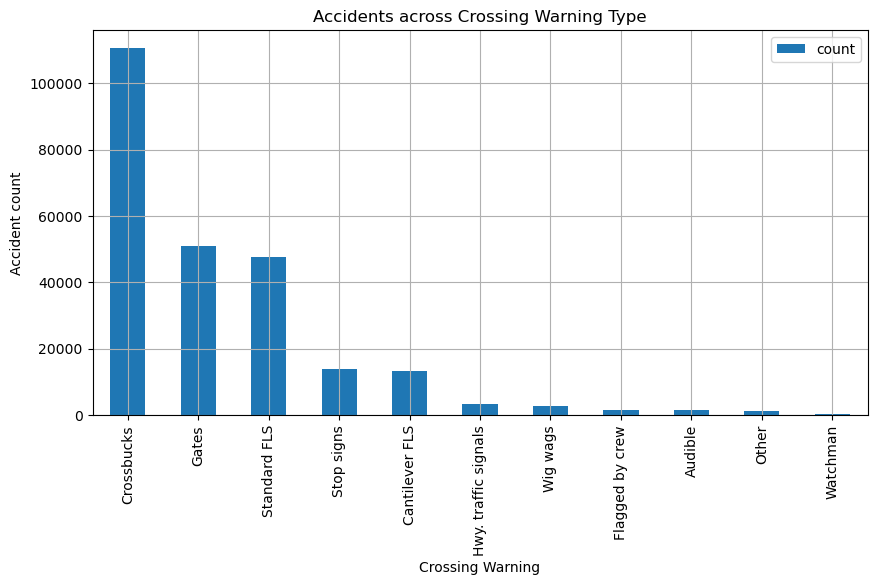

In [44]:
df['Crossing Warning Expanded 1'].value_counts().sort_values(ascending=False) \
  .plot.bar(figsize=(10, 5), grid=True, title='Accidents across Crossing Warning Type', xlabel='Crossing Warning', legend=True, ylabel='Accident count')

**Observations**:

*   Crossbucks: The highest number of accidents occur at crossings with suggesting that this warning type may be less effective or more commonly used at high-risk crossings.

*   Gates and Standard Flashing Light Signals (FLS): These warning types also account for a significant number of accidents indicating that even more advanced warning systems are associated with a substantial number of incidents.

<Axes: title={'center': 'Accidents across vehicle damage'}, ylabel='Frequency'>

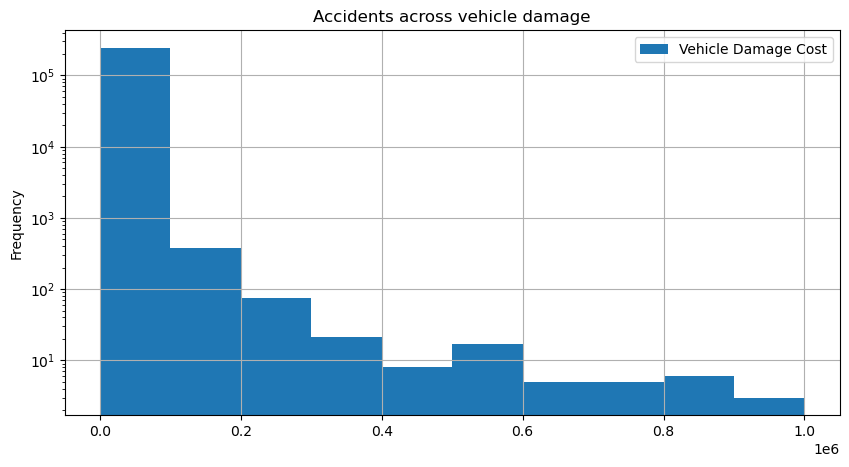

In [45]:
df['Vehicle Damage Cost'].plot.hist(figsize=(10, 5), grid=True, title='Accidents across vehicle damage', legend=True, logy=True)

**Observations**:

*   Peak Damage Range: The majority of accidents result in vehicle damage costs between \$400 and \$1200, with the highest frequency in the \$400-\$800 range.

*   Potential Inflation Impact: The analysis of these damage costs should consider that these values might not account for inflation, meaning that the apparent concentration of costs in lower ranges could reflect older data or lower relative values rather than a true representation of accident severity.

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246532 entries, 0 to 246663
Data columns (total 62 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   Railroad Name                         246532 non-null  category      
 1   Maintenance Railroad Name             246532 non-null  category      
 2   Nearest Station                       246532 non-null  category      
 3   County Name                           246532 non-null  category      
 4   State Name                            246532 non-null  category      
 5   City Name                             246532 non-null  category      
 6   Highway Name                          246532 non-null  category      
 7   Public/Private                        246532 non-null  category      
 8   Highway User                          246532 non-null  category      
 9   Estimated Vehicle Speed               246532 non-null  float64  

# Feature engineering

## Categorical Encoding

In [47]:
selected_features = ['Time of day', 'Weather Condition', 'Crossing Illuminated', 'Highway User',
          'Temperature', 'Visibility', 'Weather Condition', 'Number of Locomotive Units', 'Number of Cars', 'Train Speed', 'View Obstruction',
          'Vehicle Damage Cost', 'Month', 'Season', 'Estimated Vehicle Speed', 'State Name',
          'Highway User Action', 'Number Vehicle Occupants', 'District', 'Track Class', 'Driver Condition', 'Railroad Name', 'Public/Private', 'Crossing Warning Expanded 1', 'Estimated/Recorded Speed']

ordinal_features = ['View Obstruction', 'District', 'Highway User', 'Track Class', 'Driver Condition', 'Railroad Name', 'Public/Private', 'State Name']
one_hot_features = ['Time of day', 'Crossing Illuminated', 'Visibility', 'Weather Condition', 'Season', 'Highway User Action', 'Crossing Warning Expanded 1', 'Estimated/Recorded Speed']

df_extracted = df[selected_features].copy()
df_extracted = pd.get_dummies(df_extracted, columns=one_hot_features)

for col in ordinal_features:
  df_extracted[col] = df_extracted[col].cat.codes

In [48]:
from datetime import datetime

In [49]:
df_extracted['Report Age'] = (datetime.now().year - df['Year'])
df_extracted['Total Damaged People'] = df['Passengers Killed'] + df['Passengers Injured'] + df['Employees Killed'] + df['Employees Injured']
df_extracted['Speed Difference'] = df['Estimated Vehicle Speed'] - df['Train Speed']
df_extracted['Weekend'] = df['DateTime'].dt.dayofweek > 4

In [50]:
temperature_score = (df['Temperature'] - df['Temperature'].min()) / (df['Temperature'].max() - df['Temperature'].min())

visibility_score = df['Visibility'].map({
    'Day': 0.1,
    'Dusk': 0.4,
    'Dawn': 0.4,
    'Dark': 0.9
})

weather_scores = df['Weather Condition'].map({
    'Clear': 0.1,
    'Cloudy': 0.3,
    'Fog': 0.7,
    'Rain': 0.6,
    'Sleet': 0.8,
    'Snow': 0.8
})

df_extracted['Weather Impact Score'] = (0.4 * temperature_score) + (0.2 * visibility_score) + (0.4 * weather_scores)

In [51]:
peak_hours_morning = range(7, 10)  # 7 AM to 9 AM
peak_hours_evening = range(16, 19)  # 4 PM to 6 PM

df_extracted['Peak Traffic Hours'] = df['DateTime'].dt.hour.apply(lambda x: True if x in peak_hours_morning or x in peak_hours_evening else False).astype(bool)

In [52]:
temperature_score = (df['Temperature'] - df['Temperature'].min()) / (df['Temperature'].max() - df['Temperature'].min())

visibility_score = df['Visibility'].map({
    'Day': 0.1,
    'Dusk': 0.4,
    'Dawn': 0.4,
    'Dark': 0.9
})

weather_scores = df['Weather Condition'].map({
    'Clear': 0.1,
    'Cloudy': 0.3,
    'Fog': 0.7,
    'Rain': 0.6,
    'Sleet': 0.8,
    'Snow': 0.8
})

df_extracted['Weather Impact Score'] = (0.4 * temperature_score) + (0.2 * visibility_score) + (0.4 * weather_scores)

In [53]:
crossing_warning_scores = df['Crossing Warning Expanded 1'].map({
    'Hwy. traffic signals': 0.2,
    'Crossbucks': 0.7,
    'Audible': 0.4,
    'Flagged by crew': 0.6,
    'Standard FLS': 0.3,
    'Stop signs': 0.5,
    'Gates': 0.2,
    'Other': 0.6,
    'Wig wags': 0.5,
    'Cantilever FLS': 0.3,
    'Watchman': 0.5
}).astype('float')

illumination_scores = df['Crossing Illuminated'].map({
    'Yes': 0.1,
    'No': 0.7,
    'Unknown': 0.5
}).astype('float')

view_obstruction_scores = df['View Obstruction'].map({
    'Not obstructed': 0.1,
    'Standing railroad equipment': 0.8,
    'Other': 0.6,
    'Highway vehicles': 0.5,
    'Permanent structure': 0.7,
    'Topography': 0.6,
    'Vegetation': 0.7,
    'Passing train': 0.8
}).astype('float')

df_extracted['Crossing Risk Score'] = (0.4 * crossing_warning_scores) + (0.3 * illumination_scores) + (0.3 * view_obstruction_scores)

In [54]:
df_extracted['Severity Score'] = (
    0.2 * df['Crossing Users Killed'] +
    0.1 * df['Crossing Users Injured'] +
    0.1 * df['Vehicle Damage Cost'] / 1000 +
    0.2 * df['Employees Killed'] +
    0.1 * df['Employees Injured'] +
    0.2 * df['Passengers Killed'] +
    0.1 * df['Passengers Injured']
)

In [55]:
high_risk_cities = df['City Name'].value_counts().sort_values(ascending=False).head(20).index.tolist()
high_risk_states = df['State Name'].value_counts().sort_values(ascending=False).head(10).index.tolist()

df_extracted['High Risk City'] = df['City Name'].apply(lambda x: True if x in high_risk_cities else False).astype(bool)
df_extracted['High Risk State'] = df['State Name'].apply(lambda x: True if x in high_risk_states else False).astype(bool)

In [56]:
position_scores = df['Highway User Position'].map({
    'Stalled or stuck on crossing': 1.0,
    'Moving over crossing': 0.3,
    'Stopped on crossing': 0.7,
    'Blocked on crossing by gates': 0.5,
    'Trapped on crossing by traffic': 0.9
}).astype('float')

df_extracted['Vehicle Involvement Score'] = (0.4 * df['Number Vehicle Occupants']) + (0.2 * df['Vehicle Damage Cost'] / 1000) + (0.4 * position_scores)

In [57]:
df_extracted.head()

,Highway User,Temperature,Number of Locomotive Units,Number of Cars,Train Speed,View Obstruction,Vehicle Damage Cost,Month,Estimated Vehicle Speed,State Name,Number Vehicle Occupants,District,Track Class,Driver Condition,Railroad Name,Public/Private,Time of day_Early Morning,Time of day_Evening,Time of day_Late Night,Time of day_Morning,Time of day_Night,Time of day_Noon,Crossing Illuminated_No,Crossing Illuminated_Unknown,Crossing Illuminated_Yes,Visibility_Dark,Visibility_Dawn,Visibility_Day,Visibility_Dusk,Weather Condition_Clear,Weather Condition_Cloudy,Weather Condition_Fog,Weather Condition_Rain,Weather Condition_Sleet,Weather Condition_Snow,Weather Condition_Clear,Weather Condition_Cloudy,Weather Condition_Fog,Weather Condition_Rain,Weather Condition_Sleet,Weather Condition_Snow,Season_Fall,Season_Spring,Season_Summer,Season_Winter,Highway User Action_Did not stop,Highway User Action_Other,Highway User Action_Stopped and then proceeded,Highway User Action_Stopped on crossing,Highway User Action_Suicide/attempted suicide,Highway User Action_Went around the gate,Highway User Action_Went around/thru temporary barricade,Highway User Action_Went thru the gate,Crossing Warning Expanded 1_Audible,Crossing Warning Expanded 1_Cantilever FLS,Crossing Warning Expanded 1_Crossbucks,Crossing Warning Expanded 1_Flagged by crew,Crossing Warning Expanded 1_Gates,Crossing Warning Expanded 1_Hwy. traffic signals,Crossing Warning Expanded 1_Other,Crossing Warning Expanded 1_Standard FLS,Crossing Warning Expanded 1_Stop signs,Crossing Warning Expanded 1_Watchman,Crossing Warning Expanded 1_Wig wags,Estimated/Recorded Speed_E,Estimated/Recorded Speed_R,Report Age,Total Damaged People,Speed Difference,Weekend,Weather Impact Score,Peak Traffic Hours,Crossing Risk Score,Severity Score,High Risk City,High Risk State,Vehicle Involvement Score
0,7,65.0,4.0,85.0,28.0,1,10000.0,1,0.000000,24,0.0,3,3,2,873,1,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,38,0.0,-28.000000,False,0.327699,False,0.14,1.00,False,False,2.40
1,9,80.0,1.0,4.0,8.0,1,200.0,2,45.000000,24,1.0,3,1,2,236,1,False,False,False,False,False,True,True,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,38,1.0,37.000000,False,0.133891,False,0.32,0.12,False,False,0.56
2,0,95.0,1.0,6.0,1.0,1,200.0,19,11.742137,24,2.0,3,4,2,236,1,False,False,False,False,False,True,False,True,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,38,0.0,10.742137,False,0.140083,False,0.26,0.02,False,False,0.96
3,9,65.0,1.0,6.0,4.0,1,0.0,4,5.000000,36,1.0,3,1,2,887,1,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,48,0.0,1.000000,True,0.287699,False,0.52,0.00,False,False,0.52
4,0,85.0,2.0,96.0,25.0,1,1000.0,14,25.000000,24,1.0,3,2,0,364,1,False,False,False,False,True,False,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,38,0.0,0.000000,False,0.295955,False,0.40,0.20,False,False,0.72


## Outlier removal

In [58]:
print(((df_extracted['Temperature'] < -20) | (df_extracted['Temperature'] > 120)).sum())
df_extracted = df_extracted[(df_extracted['Temperature'] > -20) & (df_extracted['Temperature'] < 120)]

107


In [59]:
print(((df_extracted['Estimated Vehicle Speed'] < 0) | (df_extracted['Estimated Vehicle Speed'] > 70)).sum())
df_extracted = df_extracted[(df_extracted['Estimated Vehicle Speed'] > 0) & (df_extracted['Estimated Vehicle Speed'] < 70)]

178


In [60]:
print(((df_extracted['Train Speed'] < 0) | (df_extracted['Train Speed'] > 80)).sum())
df_extracted = df_extracted[(df_extracted['Train Speed'] > 0) & (df_extracted['Train Speed'] < 80)]

89


In [61]:
print(((df_extracted['Vehicle Damage Cost'] < 0) | (df_extracted['Vehicle Damage Cost'] > 50000)).sum())
df_extracted = df_extracted[(df_extracted['Vehicle Damage Cost'] > 0) & (df_extracted['Vehicle Damage Cost'] < 50000)]

972


# Predictive Modeling

## Low Variance Removal

In [62]:
from sklearn.feature_selection import VarianceThreshold

df_predictive = df_extracted.copy()

threshold_n = 0.95
sel = VarianceThreshold(threshold=(threshold_n * (1 - threshold_n)))
sel.fit(df_predictive)
columns_to_keep = df_predictive.columns[sel.get_support(indices=True)]
columns_to_remove = [x for x in df_predictive.columns if x not in columns_to_keep]

print(f'Columns to remove: {columns_to_remove}')
print(f'Removed {len(df_extracted.columns) - len(columns_to_keep)} columns.')

df_predictive = df_predictive[columns_to_keep]

Columns to remove: ['Visibility_Dawn', 'Visibility_Dusk', 'Weather Condition_Fog', 'Weather Condition_Sleet', 'Weather Condition_Snow', 'Weather Condition_Fog', 'Weather Condition_Sleet', 'Weather Condition_Snow', 'Highway User Action_Other', 'Highway User Action_Stopped on crossing', 'Highway User Action_Suicide/attempted suicide', 'Highway User Action_Went around/thru temporary barricade', 'Highway User Action_Went thru the gate', 'Crossing Warning Expanded 1_Audible', 'Crossing Warning Expanded 1_Flagged by crew', 'Crossing Warning Expanded 1_Hwy. traffic signals', 'Crossing Warning Expanded 1_Other', 'Crossing Warning Expanded 1_Watchman', 'Crossing Warning Expanded 1_Wig wags', 'Weather Impact Score', 'Crossing Risk Score']
Removed 21 columns.


## Driver Condition Prediction

In [63]:
prediction_column = 'Driver Condition'
features = [x for x in df_predictive.columns if x != prediction_column]

### Scaling

In [64]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

min_max_features = ['Temperature', 'Train Speed', 'Estimated Vehicle Speed', 'Severity Score', 'Vehicle Involvement Score']
min_max_scaler = MinMaxScaler()
df_predictive[min_max_features] = min_max_scaler.fit_transform(df_predictive[min_max_features])

z_score_features = ['Number of Locomotive Units', 'Number of Cars', 'Speed Difference', 'Total Damaged People']
standard_scaler = StandardScaler()
df_predictive[z_score_features] = standard_scaler.fit_transform(df_predictive[z_score_features])

df_predictive['Vehicle Damage Cost'] = np.log1p(df_predictive['Vehicle Damage Cost'].clip(lower=0))

X = np.array(df_predictive[features].astype('float'))
y = np.array(df_predictive[prediction_column].astype(int))

### Training and Cross Validation

In [66]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, f1_score, precision_score, balanced_accuracy_score, make_scorer

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import RidgeClassifier

import xgboost

models = [
    DecisionTreeClassifier(),
    RidgeClassifier(),
    RandomForestClassifier(),
    xgboost.XGBClassifier(),
    KNeighborsClassifier(),
    BernoulliNB(),
]
scoring = {
    'accuracy_score': make_scorer(accuracy_score),
    'f1_score': make_scorer(lambda y_true, y_pred: f1_score(y_true, y_pred, average='weighted')),
    'precision_score': make_scorer(lambda y_true, y_pred: precision_score(y_true, y_pred, average='weighted')),
    'balanced_accuracy_score': make_scorer(balanced_accuracy_score)
}

for model in models:
    print(f'{model.__class__.__name__}')
    scores = cross_validate(model, X, y, cv=5, scoring=scoring)
    scores_df = pd.DataFrame(scores)

    summary_df = pd.DataFrame({
        'Ave': scores_df.mean(),
        'Std': scores_df.std(),
        'Min': scores_df.min(),
        'Max': scores_df.max()
    })

    print(summary_df.round(4))

DecisionTreeClassifier
                                 Ave     Std     Min     Max
fit_time                      3.8784  0.3095  3.5743  4.2668
score_time                    0.0376  0.0116  0.0310  0.0584
test_accuracy_score           0.9265  0.0137  0.9045  0.9424
test_f1_score                 0.9266  0.0136  0.9047  0.9424
test_precision_score          0.9267  0.0135  0.9051  0.9424
test_balanced_accuracy_score  0.8979  0.0164  0.8753  0.9169
RidgeClassifier
                                 Ave     Std     Min     Max
fit_time                      0.3471  0.0728  0.2666  0.4596
score_time                    0.0424  0.0086  0.0331  0.0519
test_accuracy_score           0.6616  0.0023  0.6585  0.6645
test_f1_score                 0.5957  0.0095  0.5844  0.6058
test_precision_score          0.6021  0.0136  0.5875  0.6192
test_balanced_accuracy_score  0.3883  0.0079  0.3792  0.3973
RandomForestClassifier
                                  Ave     Std      Min      Max
fit_time            

In [67]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = xgboost.XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     12571
           1       0.92      0.83      0.87      3333
           2       0.98      0.97      0.97     27735

    accuracy                           0.95     43639
   macro avg       0.93      0.91      0.92     43639
weighted avg       0.95      0.95      0.95     43639



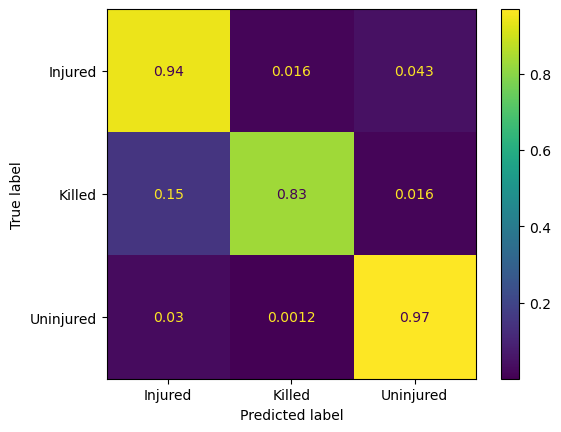

In [68]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred, normalize='true'), 
                       display_labels=['Injured', 'Killed', 'Uninjured']).plot()

## Total Damaged People	Prediction

In [69]:
from sklearn.feature_selection import VarianceThreshold

df_predictive = df_extracted.copy()

threshold_n = 0.95
sel = VarianceThreshold(threshold=(threshold_n * (1 - threshold_n)))
sel.fit(df_predictive)
columns_to_keep = df_predictive.columns[sel.get_support(indices=True)]
columns_to_remove = [x for x in df_predictive.columns if x not in columns_to_keep]

print(f'Columns to remove: {columns_to_remove}')
print(f'Removed {len(df_extracted.columns) - len(columns_to_keep)} columns.')

df_predictive = df_predictive[columns_to_keep]

Columns to remove: ['Visibility_Dawn', 'Visibility_Dusk', 'Weather Condition_Fog', 'Weather Condition_Sleet', 'Weather Condition_Snow', 'Weather Condition_Fog', 'Weather Condition_Sleet', 'Weather Condition_Snow', 'Highway User Action_Other', 'Highway User Action_Stopped on crossing', 'Highway User Action_Suicide/attempted suicide', 'Highway User Action_Went around/thru temporary barricade', 'Highway User Action_Went thru the gate', 'Crossing Warning Expanded 1_Audible', 'Crossing Warning Expanded 1_Flagged by crew', 'Crossing Warning Expanded 1_Hwy. traffic signals', 'Crossing Warning Expanded 1_Other', 'Crossing Warning Expanded 1_Watchman', 'Crossing Warning Expanded 1_Wig wags', 'Weather Impact Score', 'Crossing Risk Score']
Removed 21 columns.


In [70]:
prediction_column = 'Total Damaged People'
features = [x for x in df_predictive.columns if x not in ('Total Damaged People', 'Severity Score')] # Severity Score is directly using Total Damaged People

### Scaling

In [71]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

min_max_features = ['Temperature', 'Train Speed', 'Estimated Vehicle Speed', 'Vehicle Involvement Score']
min_max_scaler = MinMaxScaler()
df_predictive[min_max_features] = min_max_scaler.fit_transform(df_predictive[min_max_features])

z_score_features = ['Number of Locomotive Units', 'Number of Cars', 'Speed Difference']
standard_scaler = StandardScaler()
df_predictive[z_score_features] = standard_scaler.fit_transform(df_predictive[z_score_features])

df_predictive['Vehicle Damage Cost'] = np.log1p(df_predictive['Vehicle Damage Cost'].clip(lower=0))

X = np.array(df_predictive[features].astype('float'))
y = np.array(df_predictive[prediction_column].astype(int))

### Training and Cross Validation

In [73]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error, mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet, Ridge, BayesianRidge, LinearRegression
import xgboost

models = [
    LinearRegression(),
    Ridge(),
    ElasticNet(),
    BayesianRidge(),
    xgboost.XGBRegressor(),
    DecisionTreeRegressor(),
]
scoring = {
    'r2_score': make_scorer(r2_score),
    'mean_absolute_error': make_scorer(mean_absolute_error),
    'mean_squared_error': make_scorer(mean_squared_error)
}

for model in models:
    print(f'{model.__class__.__name__}')
    scores = cross_validate(model, X, y, cv=5, scoring=scoring)
    scores_df = pd.DataFrame(scores)

    summary_df = pd.DataFrame({
        'Ave': scores_df.mean(),
        'Std': scores_df.std(),
        'Min': scores_df.min(),
        'Max': scores_df.max()
    })

    print(summary_df.round(4))

LinearRegression
                             Ave     Std     Min     Max
fit_time                  0.7008  0.0631  0.5990  0.7497
score_time                0.0128  0.0076  0.0000  0.0193
test_r2_score             0.0167  0.0044  0.0110  0.0229
test_mean_absolute_error  0.0668  0.0062  0.0594  0.0751
test_mean_squared_error   0.1875  0.0977  0.1037  0.3380
Ridge
                             Ave     Std     Min     Max
fit_time                  0.2005  0.0095  0.1863  0.2131
score_time                0.0063  0.0086  0.0000  0.0159
test_r2_score             0.0116  0.0038  0.0072  0.0175
test_mean_absolute_error  0.0692  0.0056  0.0629  0.0766
test_mean_squared_error   0.1885  0.0980  0.1043  0.3393
ElasticNet
                             Ave     Std     Min     Max
fit_time                  0.4101  0.0500  0.3653  0.4864
score_time                0.0103  0.0095  0.0000  0.0200
test_r2_score            -0.0000  0.0001 -0.0001  0.0001
test_mean_absolute_error  0.0576  0.0024  0.0551  0.06